# MScFE 610 Econometrics (C22-S1) - Groupwork Assignment Submission 2 M5

### Impoting required libraries

In [1]:
import warnings
from IPython.display import Image
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib import rcParams
import statsmodels.api as sm
import datetime as dt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch import arch_model

In [2]:
warnings.filterwarnings('ignore')
%matplotlib inline
rcParams['figure.figsize'] = 20,10

### Step 0: Selecting a data set

For gold ETF, we choose SPDR Gold Trust (GLD) and for non-US equity ETF, we choose: iShares MSCI Emerging Markets ETF (EEM). We also pull data for Grayscale Bitcoin Trust (GBTC).

### Step 1: Data Importing

We consider three time points for splitting the pulled data:

In [3]:
Jan20 = dt.datetime(2020,1,1)
Apr20 = dt.datetime(2020,4,1)
Jul20 = dt.datetime(2020,7,1)
Oct20 = dt.datetime(2020,10,1)
Jan21 = dt.datetime(2021,1,1)

#### Gold ETF (GLD):

In [4]:
GLD = yf.download('GLD',start = Jan20, end = Jan21,  progress = False)
GLD[Apr20:Jan21].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-01,148.199997,150.080002,147.850006,149.449997,149.449997,11827400
2020-04-02,151.199997,152.500000,150.699997,151.899994,151.899994,9188300
2020-04-03,152.229996,153.089996,151.660004,152.649994,152.649994,8469100
2020-04-06,154.160004,157.220001,153.960007,156.880005,156.880005,14739300
2020-04-07,155.330002,156.139999,154.380005,156.039993,156.039993,9195400


In [5]:
GLD = GLD['Adj Close']

#### Emerging Markets ETF (EEM):

In [6]:
EEM = yf.download('EEM', start = Jan20, end = Jan21, progress = False)
EEM[Apr20:Jan21].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-01,33.099998,33.330002,32.619999,32.669998,31.540220,65580600
2020-04-02,33.290001,33.939999,33.200001,33.770000,32.602188,55784000
2020-04-03,33.689999,33.860001,32.950001,33.130001,31.984320,68672500
2020-04-06,34.439999,34.950001,34.299999,34.939999,33.731724,82394800
2020-04-07,36.090000,36.119999,35.049999,35.119999,33.905495,74322600


In [7]:
EEM = EEM['Adj Close']

#### Bitcoin (BTC):

In [8]:
GBTC = yf.download('GBTC', start = Jan20, end = Jan21, progress = False)
GBTC[Apr20:Jan21].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-01,6.800,6.90,6.41,6.495,6.495,4274800
2020-04-02,7.000,7.87,6.98,7.720,7.720,7980600
2020-04-03,7.940,7.94,7.25,7.480,7.480,3059800
2020-04-06,7.824,8.06,7.71,7.950,7.950,4910400
2020-04-07,8.070,8.15,7.61,7.660,7.660,3469900


In [9]:
GBTC = GBTC['Adj Close']

#### Integrating the data

In [10]:
data = pd.DataFrame({'EEM':EEM, 'GLD':GLD, 'GBTC':GBTC})
data[Apr20:Jan21].head()

,EEM,GLD,GBTC
Date,,,
2020-04-01,31.540220,149.449997,6.495
2020-04-02,32.602188,151.899994,7.720
2020-04-03,31.984320,152.649994,7.480
2020-04-06,33.731724,156.880005,7.950
2020-04-07,33.905495,156.039993,7.660


In [11]:
data.isnull().any()

EEM     False
GLD     False
GBTC    False
dtype: bool

In [12]:
data_Q2 = data[Apr20:Jul20]
data_Q3 = data[Jul20:Oct20]
data_Q4 = data[Oct20:Jan21]

### Step 2: Data Processing

Compute the daily returns of your gold ETF, your Equity ETF, and bitcoin of April 2020 through Dec 2020

In [13]:
data['GLD_lr'] = np.log(data['GLD']).diff()
data['EEM_lr'] = np.log(data['EEM']).diff()
data['GBTC_lr'] = np.log(data['GBTC']).diff()
data[Apr20:Jan21].head()

,EEM,GLD,GBTC,GLD_lr,EEM_lr,GBTC_lr
Date,,,,,,
2020-04-01,31.540220,149.449997,6.495,0.009412,-0.043720,-0.091875
2020-04-02,32.602188,151.899994,7.720,0.016261,0.033116,0.172782
2020-04-03,31.984320,152.649994,7.480,0.004925,-0.019134,-0.031582
2020-04-06,33.731724,156.880005,7.950,0.027334,0.053193,0.060939
2020-04-07,33.905495,156.039993,7.660,-0.005369,0.005138,-0.037160


### Step 3: Data Summaries

In [14]:
data['EEM_MA20'] = data['EEM'].rolling(window=20).mean()
data['GLD_MA20'] = data['GLD'].rolling(window=20).mean()
data['GBTC_MA20'] = data['GBTC'].rolling(window=20).mean()
data = data[Apr20:Jan21]
data.head()

,EEM,GLD,GBTC,GLD_lr,EEM_lr,GBTC_lr,EEM_MA20,GLD_MA20,GBTC_MA20
Date,,,,,,,,,
2020-04-01,31.540220,149.449997,6.495,0.009412,-0.043720,-0.091875,33.350866,149.164499,7.5127
2020-04-02,32.602188,151.899994,7.720,0.016261,0.033116,0.172782,33.003316,148.884998,7.3522
2020-04-03,31.984320,152.649994,7.480,0.004925,-0.019134,-0.031582,32.665420,148.639998,7.1972
2020-04-06,33.731724,156.880005,7.950,0.027334,0.053193,0.060939,32.547156,148.593498,7.1512
2020-04-07,33.905495,156.039993,7.660,-0.005369,0.005138,-0.037160,32.345866,148.671498,7.0712


### Step 4: Graphing

In this section, we graph both prices and moving averages of the financial products and provide some simple technical discussion

Text(0, 0.5, 'Price (USD)')

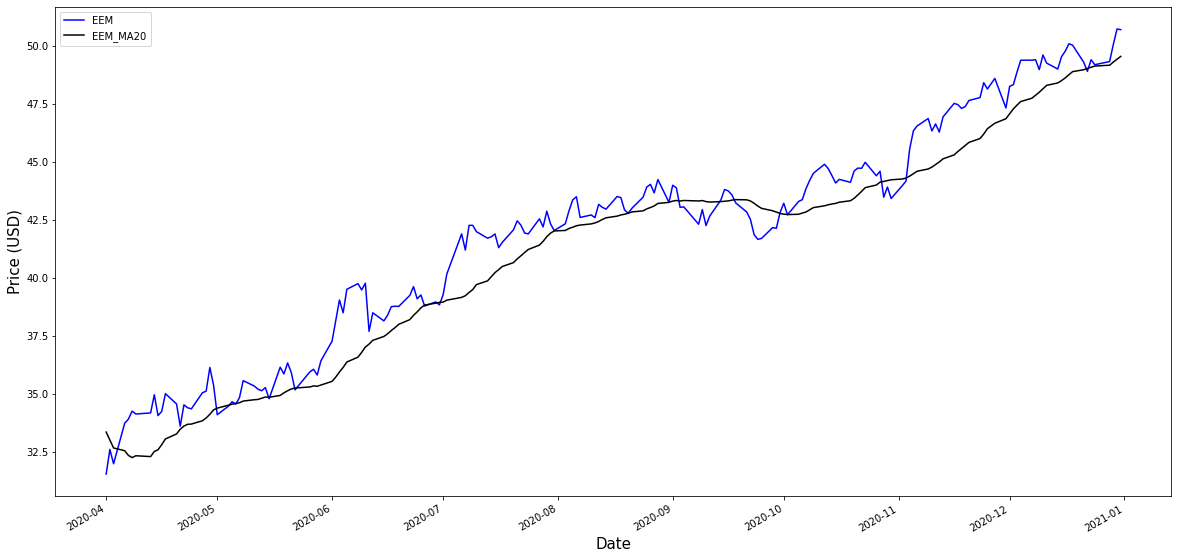

In [15]:
ax1 = data[['EEM','EEM_MA20']].plot(color = ['blue','black'])
ax1.set_xlabel('Date', size=15)
ax1.set_ylabel('Price (USD)', size=15)

For EEM, the moving average has basically acted as up-trend support and we have only short-duration of crossing of the price and moving average.

Text(0, 0.5, 'Price (USD)')

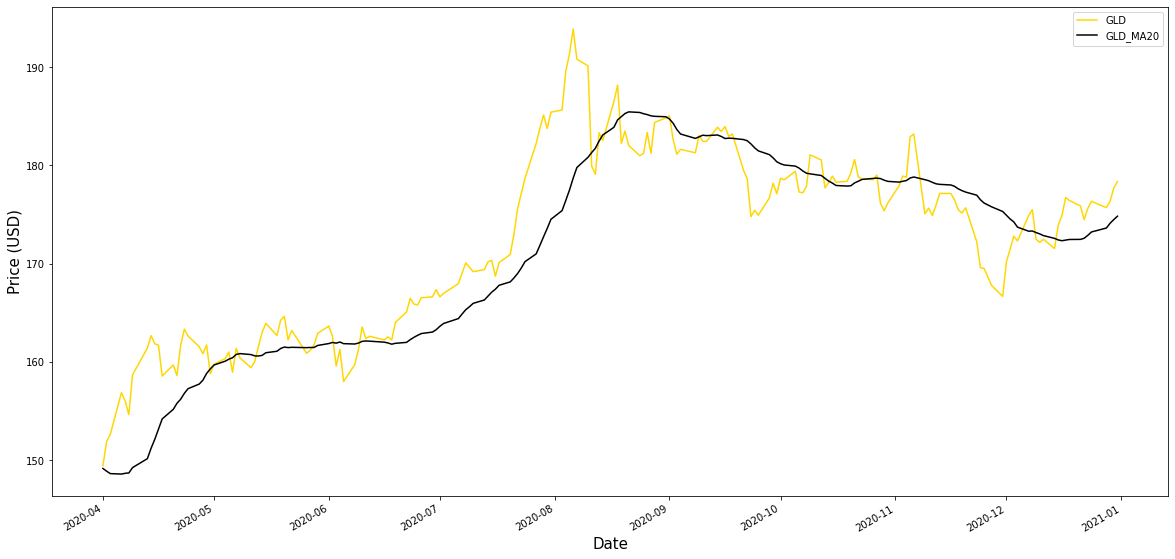

In [16]:
ax2 = data[['GLD','GLD_MA20']].plot(color = ['gold','black'])
ax2.set_xlabel('Date', size=15)
ax2.set_ylabel('Price (USD)', size=15)

For GLD, the moving average has acted as up-trend support till mid-Aug and we have then a major crossing of the price and moving average which has lead to a sideways/down-trend price action.

Text(0, 0.5, 'Price (USD)')

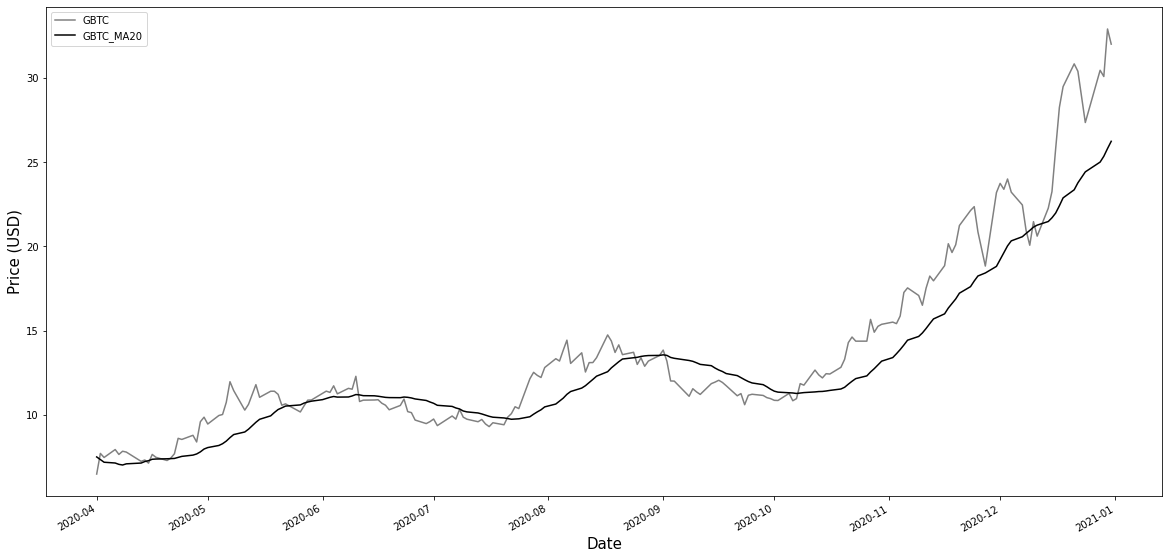

In [17]:
ax3 = data[['GBTC','GBTC_MA20']].plot(color = ['gray','black'])
ax3.set_xlabel('Date', size=15)
ax3.set_ylabel('Price (USD)', size=15)

For GBTC, we have alternate crossing of the moving average and price till Oct which describes a sideways price action by then. However, after Oct, we have a major uptrend and no significant crossing in the continuation.

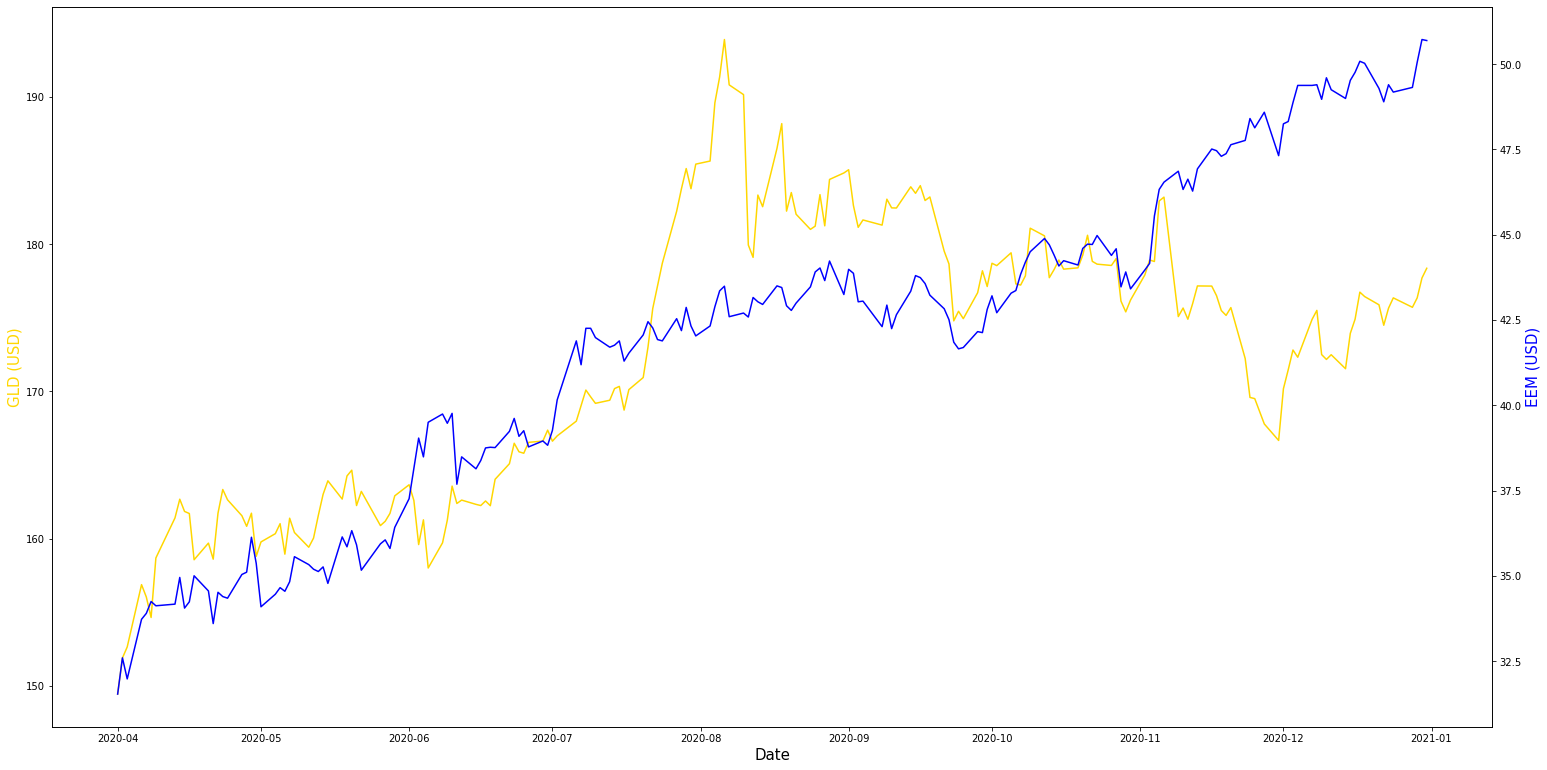

In [18]:
fig1 = plt.figure()
ax4 = fig1.add_axes([.1,.1,1,1])
ax4.plot(data.index, data.GLD,  color='gold')
ax4.set_xlabel('Date', size = 15)
ax4.set_ylabel('GLD (USD)', size=15, color='gold')
ax4_2 = ax4.twinx()
ax4_2.plot(data.index, data.EEM, color='blue')
ax4_2.set_ylabel('EEM (USD)', size=15, color='blue')
plt.show()

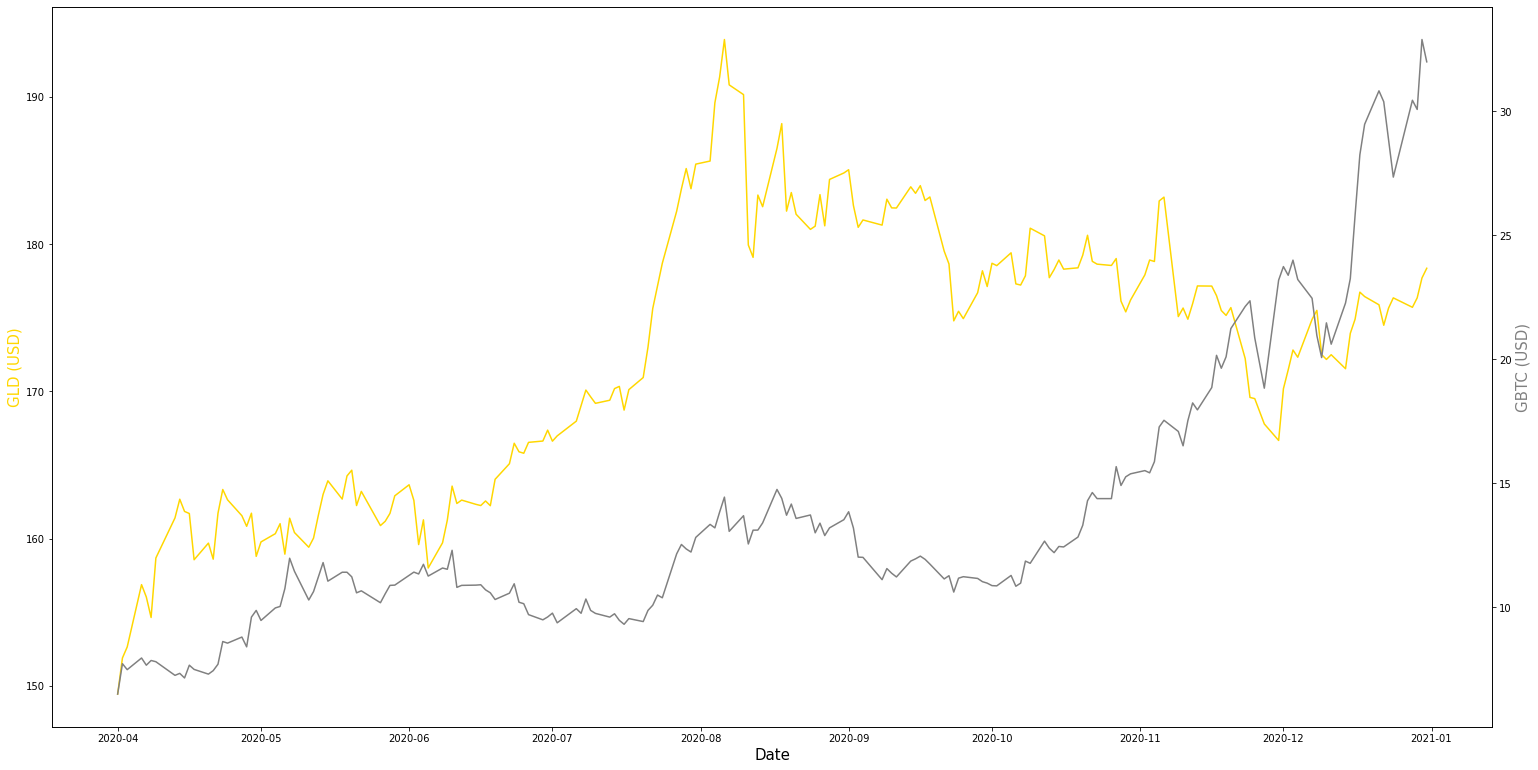

In [19]:
fig2 = plt.figure()
ax5 = fig2.add_axes([.1,.1,1,1])
ax5.plot(data.index, data.GLD,  color='gold')
ax5.set_xlabel('Date', size = 15)
ax5.set_ylabel('GLD (USD)', size=15, color='gold')
ax5_2 = ax5.twinx()
ax5_2.plot(data.index, data.GBTC, color='gray')
ax5_2.set_ylabel('GBTC (USD)', size=15, color='gray')
plt.show()

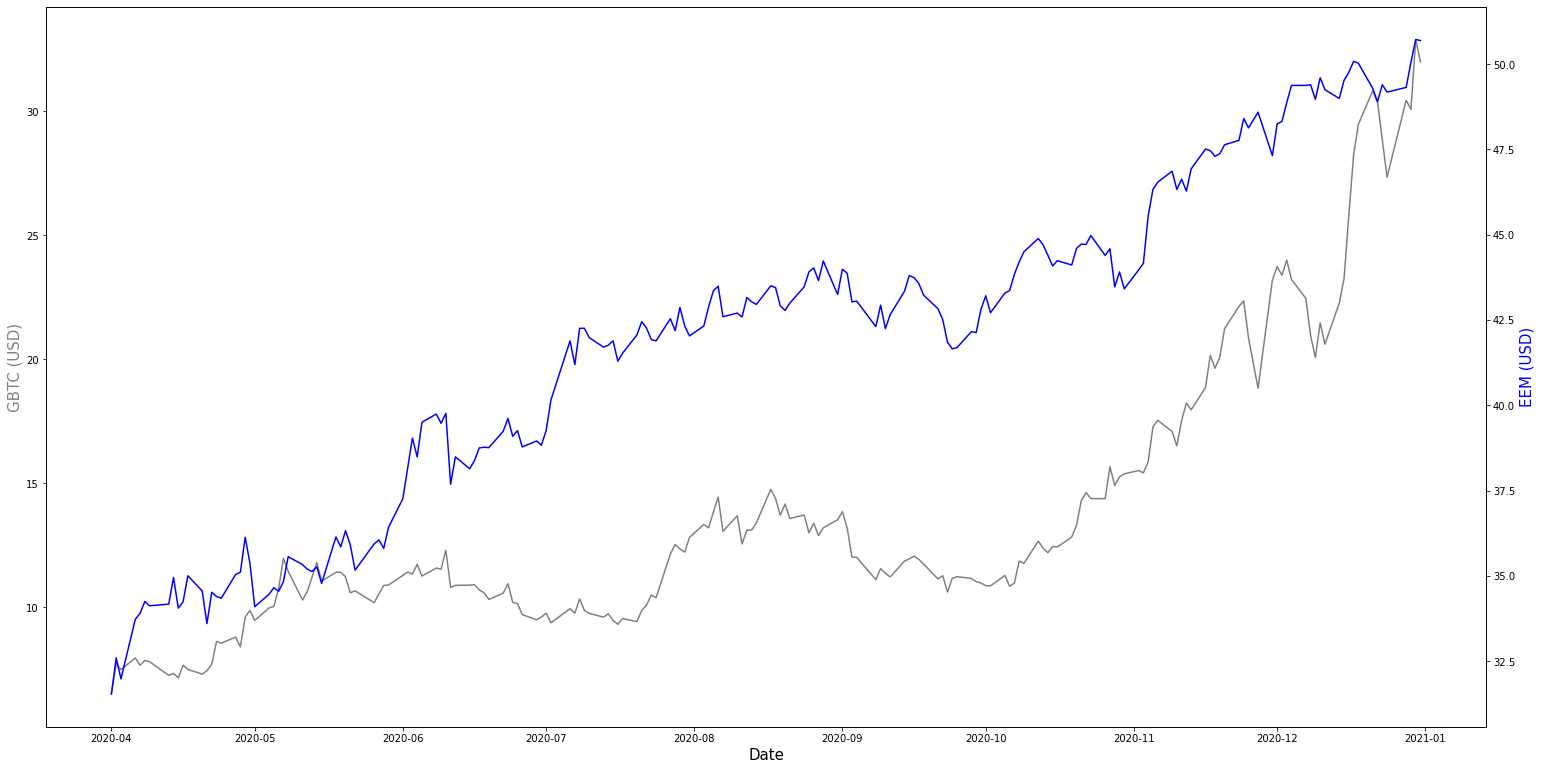

In [20]:
fig3 = plt.figure()
ax6 = fig3.add_axes([.1,.1,1,1])
ax6.plot(data.index, data.GBTC,  color='gray')
ax6.set_xlabel('Date', size = 15)
ax6.set_ylabel('GBTC (USD)', size=15, color='gray')
ax6_2 = ax6.twinx()
ax6_2.plot(data.index, data.EEM, color='blue')
ax6_2.set_ylabel('EEM (USD)', size=15, color='blue')
plt.show()

### Step 5: Fitting a GARCH Model

We consider the time-series returns to fit the GARCH model. In step 6, it is shown that the time-series returns are stationay. A more complete approach would be to first fit an ARIMA model, find residual and fit the GARCH model to the residual. However, since the problem asks to fit the GARCH model directly, we will do accordingly. In this case we assume that the time-series return consists of a mean and a residual term. To find the residual terms, we substract the mean value from the return series. 

We choose to model the gold (GLD) volatility using GARCH models. First, we try estimating the model orders using ACF/PACF:

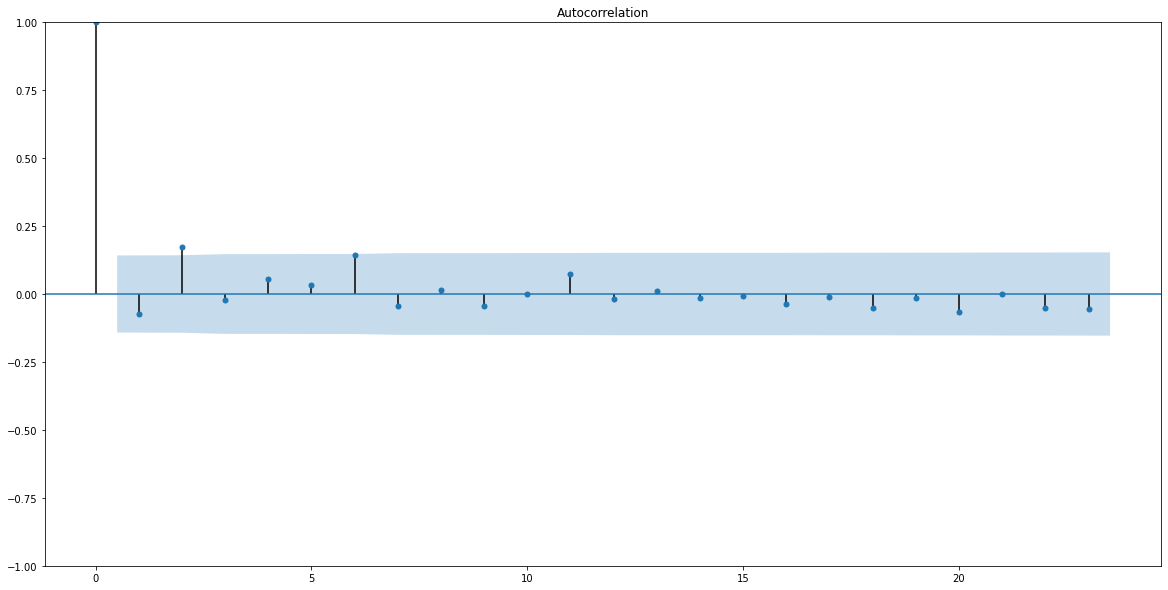

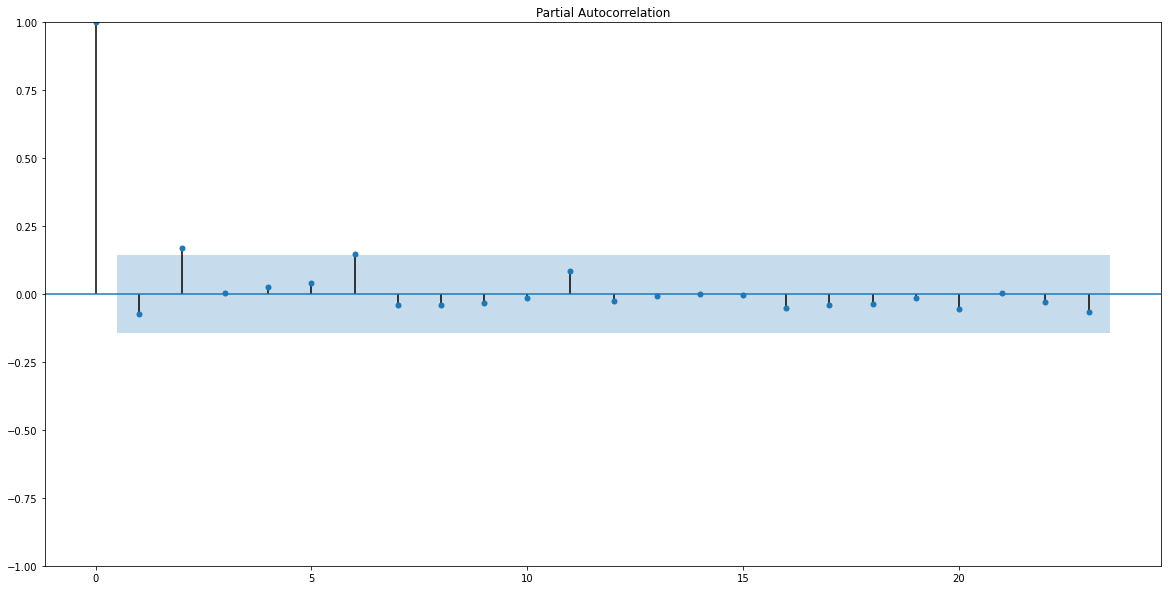

In [21]:
series = data['GLD_lr'] - data['GLD_lr'].mean()
plot_acf(series**2)
plt.show()
plot_pacf(series**2)
plt.show()

Based on the ACF/PACF plots, we see minimal lagged correlations. So, we choose GARCH(1,1) models.

#### Q2 modeling:

In [22]:
data_Q2 = data[Apr20:Jul20]
data_Q3 = data[Jul20:Oct20]
data_Q4 = data[Oct20:Jan21]

In [23]:
series_Q2 = data_Q2['GLD_lr']-data_Q2['GLD_lr'].mean()
model_Q2 = arch_model(series_Q2, p=1, q=1)
model_Q2.fit().summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: -203.9153052545238
Iteration:      2,   Func. Count:     18,   Neg. LLF: -204.0320264600674
Iteration:      3,   Func. Count:     32,   Neg. LLF: -204.03211774378994
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -204.03211831241742
            Iterations: 7
            Function evaluations: 32
            Gradient evaluations: 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 GLD_lr   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                204.032
Distribution:                  Normal   AIC:                          -400.064
Method:            Maximum Likelihood   BIC:                          -391.429
                                        No. Observations:                   64
Date:                Thu, Apr 21 2022   Df Residuals:                       63
Time:                        11:18:49   Df Model:                            1
                                   Mean Model                                  
===============================================================================
                  coef    std err          t      P>|t|        95.0% Conf. Int.
-------------------------------------------------------------------------------
mu         -5.6452e-04  3.333e-06   -169.364      0.000 [-5.710e-04,-5.580e-04]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.0694e-06  2.138e-10   9678.871      0.000 [2.069e-06,2.070e-06]
alpha[1]       0.1000  8.662e-02      1.154      0.248  [-6.978e-02,  0.270]
beta[1]        0.8800  7.112e-02     12.374  3.623e-35     [  0.741,  1.019]
============================================================================

Covariance estimator: robust
"""

Based on the Q2 results:
$$\omega = 2.07(10^{-6}), \alpha = 0,  \beta = 0.88$$
So, the long-term variance (unconditional) being  $\frac{\omega}{1-\alpha-\beta}$ is equal to: $0.000017245$ 

#### Q3 modeling:

In [24]:
series_Q3 = data_Q3['GLD_lr']-data_Q3['GLD_lr'].mean()
model_Q3 = arch_model(series_Q3, p=1, q=1)
model_Q3.fit().summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: -194.84460846143165
Iteration:      2,   Func. Count:     18,   Neg. LLF: -194.85191215627268
Iteration:      3,   Func. Count:     30,   Neg. LLF: -194.85191363716862
Iteration:      4,   Func. Count:     39,   Neg. LLF: -194.95126913604946
Iteration:      5,   Func. Count:     50,   Neg. LLF: -195.11337741404716
Iteration:      6,   Func. Count:     59,   Neg. LLF: -195.15529432594542
Iteration:      7,   Func. Count:     69,   Neg. LLF: -195.18196562678654
Iteration:      8,   Func. Count:     77,   Neg. LLF: -195.1873650333114
Iteration:      9,   Func. Count:     84,   Neg. LLF: -195.23461535471375
Iteration:     10,   Func. Count:     91,   Neg. LLF: -195.26241151572623
Iteration:     11,   Func. Count:     98,   Neg. LLF: -195.26583809813445
Iteration:     12,   Func. Count:    104,   Neg. LLF: -195.2697232166479
Iteration:     13,   Func. Count:    111,   Neg. LLF: -195.27028906060323
Iteration:     14,   Func. Count:    117

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 GLD_lr   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                195.270
Distribution:                  Normal   AIC:                          -382.541
Method:            Maximum Likelihood   BIC:                          -373.843
                                        No. Observations:                   65
Date:                Thu, Apr 21 2022   Df Residuals:                       64
Time:                        11:18:49   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -1.3119e-04  1.468e-03 -8.939e-02      0.929 [-3.008e-03,2.745e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.6598e-05  4.011e-11  4.138e+05      0.000 [1.660e-05,1.660e-05]
alpha[1]       0.2280      0.249      0.916      0.360     [ -0.260,  0.716]
beta[1]        0.7146      0.123      5.805  6.437e-09     [  0.473,  0.956]
============================================================================

Covariance estimator: robust
"""

Based on the Q3 results:
$$\omega = 1.66(10^{-5}), \alpha = 0,  \beta = 0.72$$
So, the long-term variance (unconditional) being  $\frac{\omega}{1-\alpha-\beta}$ is equal to: $0.00005203$

#### Q4 modeling:

In [25]:
series_Q4 = data_Q4['GLD_lr']-data_Q4['GLD_lr'].mean()
model_Q4 = arch_model(series_Q4, p=1, q=1)
model_Q4.fit().summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: -202.35967613707507
Iteration:      2,   Func. Count:     18,   Neg. LLF: -202.36016061102492
Iteration:      3,   Func. Count:     27,   Neg. LLF: -202.36789243710967
Iteration:      4,   Func. Count:     36,   Neg. LLF: -202.36802190981643
Iteration:      5,   Func. Count:     42,   Neg. LLF: -202.43145463406125
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -202.4314566093114
            Iterations: 5
            Function evaluations: 45
            Gradient evaluations: 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 GLD_lr   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                202.431
Distribution:                  Normal   AIC:                          -396.863
Method:            Maximum Likelihood   BIC:                          -388.227
                                        No. Observations:                   64
Date:                Thu, Apr 21 2022   Df Residuals:                       63
Time:                        11:18:49   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         8.8366e-05  1.268e-03  6.966e-02      0.944 [-2.398e-03,2.574e-03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.0532e-04  4.149e-05      2.539  1.113e-02  [2.401e-05,1.866e-04]
alpha[1]   5.2748e-09  2.519e-02  2.094e-07      1.000 [-4.938e-02,4.938e-02]
beta[1]        0.0000      0.244      0.000      1.000      [ -0.478,  0.478]
=============================================================================

Covariance estimator: robust
"""

Based on the Q4 results:
$$\omega = 1.05(10^{-4}), \alpha = 0,  \beta = 0$$
So, the long-term variance (unconditional) being  $\frac{\omega}{1-\alpha-\beta}$ is equal to: $0.00010532$

### Step 6: Assessing Stationarity

For the three time_series during Q2, we use Augmented Dickey-Fuller (ADF) test to check the stationarity. To identify whether a trend component is neccessary for ADF, we first fit a linear model w.r.t time + residual and test for the hypothesis whether the time coefficient is significantly different from 0. We then conduct ADF with the respective component


In [103]:
from statsmodels.formula.api import ols
def trend_test(time_series):
  x = np.stack((time_series, range(len(time_series))), axis =1)
  x = pd.DataFrame(x, columns = ('s', 't'))
  formula = 's ~ t'
  return ols(formula, x).fit().t_test('t = 0')

#### GLD:

In [104]:
trend_test(data_Q2['GLD'])

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.1319      0.016      8.146      0.000       0.100       0.164

Given low p value, the model suggest no trend component for GLD is appropriate



In [26]:
from arch.unitroot import ADF
ADF(data_Q2['GLD'], trend = "n")

Test Statistic,1.249
P-value,0.946
Lags,1


#### EEM:

In [105]:
trend_test(data_Q2['EEM'])

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.1088      0.006     19.311      0.000       0.098       0.120

Given low p value, the model suggest no trend component for EEM is appropriate



In [27]:
ADF(data_Q2['EEM'], trend = "n")

Test Statistic,1.643
P-value,0.976
Lags,1


#### GBTC:

In [106]:
trend_test(data_Q2['GBTC'])

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0589      0.007      7.932      0.000       0.044       0.074

Given low p value, the model suggest no trend component for GLD is appropriate



In [28]:
ADF(data_Q2['GBTC'], trend = "n")

Test Statistic,0.452
P-value,0.814
Lags,0


Since the test for all three financial products has large p-value, we conclude that the null hypothesis cannot be rejected and thus suggesting they are likely to contain unit root/ non-stationary

### Step 7: Modelling Cointegration

Using Q2 and Q3 data (April - Sept period), test all the 3 combinations of cointegration using Engle-Granger and Johansen test as following: (gold, equity), (equity, bitcoin) and (bitcoin, gold).

In [35]:
data_Q2_Q3 = data[Apr20:Oct20][:-1]
data_Q2_Q3

,EEM,GLD,GBTC,GLD_lr,EEM_lr,GBTC_lr,EEM_MA20,GLD_MA20,GBTC_MA20
Date,,,,,,,,,
2020-04-01,31.540220,149.449997,6.495,0.009412,-0.043720,-0.091875,33.350866,149.164499,7.51270
2020-04-02,32.602188,151.899994,7.720,0.016261,0.033116,0.172782,33.003316,148.884998,7.35220
2020-04-03,31.984320,152.649994,7.480,0.004925,-0.019134,-0.031582,32.665420,148.639998,7.19720
2020-04-06,33.731724,156.880005,7.950,0.027334,0.053193,0.060939,32.547156,148.593498,7.15120
2020-04-07,33.905495,156.039993,7.660,-0.005369,0.005138,-0.037160,32.345866,148.671498,7.07120
...,...,...,...,...,...,...,...,...,...
2020-09-24,41.656765,175.440002,11.170,0.003712,-0.004651,0.051435,43.089018,181.801500,11.98415
2020-09-25,41.695602,174.940002,11.230,-0.002854,0.000932,0.005357,42.990945,181.486500,11.90115
2020-09-28,42.161694,176.699997,11.160,0.010010,0.011116,-0.006253,42.887532,181.102000,11.79915


##### Engle-Granger test:

For co-integration between gold and EEM in Q2

Since the ADF for all 3 time series in Q2 suggest they are I(1), we can proceed to cointegration analysis by testing the 

In [108]:
from statsmodels.tsa.stattools import coint as ct
def eg_test(eq1, eq2):
    print(f'the t-statistic is: {ct(eq1, eq2)[0]}, the p-value is: {ct(eq1, eq2)[1]}, and the critical value at 5% test statistic is {ct(eq1, eq2)[2][1]}')
eg_test(data_Q2_Q3['GLD'],data_Q2_Q3['EEM'])

the t-statistic is: -2.6101647569120376, the p-value is: 0.232754336264009, and the critical value at 5% test statistic is -3.3850526253464346


Given the large p value, we fail to reject the hypothesis that there is no cointegration relationship between the time series. Thus base on the Engle-Granger test result, we should not use GLD as a predictor for EEM, and vice versa

For co.int between bitcoin and EEM

In [37]:
eg_test(data_Q2_Q3['GBTC'],data_Q2_Q3['EEM'])

the t-statistic is: -4.011794052393752, the p-value is: 0.0069080629360069685, and the critical value at 5% test statistic is -3.3850526253464346


Since the p value is small, we can reject the hypothesis that there is no cointegration relationship between the time series. This implies GBTC might be a good predictor of EEM and vice versa

In [38]:
eg_test(data_Q2_Q3['GBTC'],data_Q2_Q3['GLD'])

the t-statistic is: -1.827850669572966, the p-value is: 0.6160980131838145, and the critical value at 5% test statistic is -3.3850526253464346


Given the large p value, we fail to reject the hypothesis that there is no cointegration relationship between the time series. Thus base on the Engle-Granger test result, we should not use GBTC as a predictor for GLD, and vice versa

##### Johansen test



In [70]:
from johansen import coint_johansen as cj
def cj_test(eq1, eq2):
   cj(np.vstack((eq1,eq2)).transpose(), 0, 1)

SyntaxError: ignored

In [66]:
cj(np.vstack((data_Q2['GLD'],data_Q2['EEM'])).transpose(), 0, 1).lr1

array([14.58567347,  1.76041976])

### Step 8: Correlation vs Cointegration

Correlation does not have a direction i.e.: $ corr(r_1,r_2) = corr(r_2,r_1) $. This is because to calculate coefficient, we normalize covarience the against the deviation standards of both $ r_1 $  and $ r_2 $.

Linear regression has direction i.e. the slope and intercept are different depending on the series we consider as the regressor variable. In this case, to calculate the slope, we normalize the covariance against the variance of the regressor and not noth of the variables.

Cointegration also has direction. This is because the coefficients that makes the linear combination of two variables that stationary cannot be interchanged to reach the same conclusion.